In [462]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



data = pd.read_csv('dataset4.csv')

In [463]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data)
#sh = enc.categories_
sh = enc.fit_transform(data)
sh

array([[  0.,  62.,   1., ..., 241., 213., 263.],
       [  1.,  61.,   1., ..., 248., 210., 255.],
       [  2.,  60.,   1., ..., 252., 206., 252.],
       ...,
       [375.,   2.,   0., ..., 151.,  69., 149.],
       [376.,   1.,   0., ..., 134.,  86., 164.],
       [377.,   0.,   0., ..., 126.,  85., 157.]])

In [464]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputer.fit(sh)
final = imputer.fit_transform(sh)
final = pd.DataFrame(final)
final

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,62.0,1.0,187.0,274.0,212.0,127.0,213.0,265.0,206.0,...,247.0,153.0,213.0,248.0,274.0,229.0,286.0,241.0,213.0,263.0
1,1.0,61.0,1.0,185.0,272.0,216.0,128.0,215.0,256.0,215.0,...,249.0,158.0,210.0,253.0,270.0,233.0,284.0,248.0,210.0,255.0
2,2.0,60.0,1.0,178.0,265.0,207.0,134.0,208.0,250.0,218.0,...,254.0,179.0,206.0,258.0,265.0,236.0,276.0,252.0,206.0,252.0
3,3.0,59.0,1.0,173.0,263.0,218.0,135.0,217.0,263.0,212.0,...,243.0,181.0,180.0,247.0,260.0,222.0,277.0,243.0,180.0,251.0
4,4.0,58.0,1.0,171.0,264.0,226.0,146.0,224.0,260.0,209.0,...,238.0,170.0,182.0,244.0,262.0,220.0,280.0,237.0,182.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,373.0,4.0,0.0,91.0,144.0,110.0,15.0,103.0,160.0,39.0,...,105.0,65.0,46.0,124.0,138.0,49.0,159.0,128.0,46.0,152.0
374,374.0,3.0,0.0,91.0,109.0,107.0,15.0,95.0,133.0,33.0,...,120.0,80.0,60.0,146.0,116.0,45.0,124.0,154.0,60.0,141.0
375,375.0,2.0,0.0,91.0,107.0,96.0,19.0,86.0,144.0,46.0,...,122.0,75.0,69.0,153.0,109.0,59.0,112.0,151.0,69.0,149.0
376,376.0,1.0,0.0,91.0,111.0,91.0,15.0,83.0,155.0,33.0,...,112.0,63.0,86.0,124.0,138.0,44.0,127.0,134.0,86.0,164.0


In [465]:
data.head()

,id,Year,Value,Total,Architecture_Total,Architecture_Residential,Architecture_Residential_Government,Architecture_Residential_Private,Architecture_Non Residential,Architecture_Non Residential_Government,...,Civil Engineering_Government_Public Projects,Civil Engineering_Government_Other,Civil Engineering_Private,Repeated_Total_Government,Repeated_Total_Private,Repeated_Architecture_Government,Repeated_Architecture_Private,Repeated_Civil Engineering_Government,Repeated_Civil Engineering_Private,Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)
0,1,2022,real,669900.0,434000.0,163100.0,3400.0,159700.0,157600.0,38500.0,...,144500.0,20300.0,71100.0,225300.0,444600.0,60500.0,373500.0,164800.0,71100.0,190200.0
1,2,2021,real,666000.0,425800.0,164700.0,3600.0,161100.0,148200.0,40000.0,...,150000.0,21000.0,69200.0,233900.0,432100.0,62900.0,362900.0,171000.0,69200.0,177400.0
2,3,2020,real,653600.0,405300.0,156800.0,4200.0,152600.0,145300.0,40300.0,...,155400.0,25200.0,67700.0,244300.0,409300.0,63700.0,341600.0,180600.0,67700.0,172700.0
3,4,2019,real,623280.0,401817.0,167478.0,4358.0,163120.0,155383.0,39078.0,...,141949.0,25354.0,54160.0,224802.0,398478.0,57499.0,344318.0,167303.0,54160.0,170465.0
4,5,2018,real,618271.0,404856.0,172580.0,5214.0,167366.0,153994.0,38778.0,...,135472.0,23397.0,54546.0,215910.0,402361.0,57041.0,347815.0,158869.0,54546.0,169762.0


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 28 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   id                                                                                                 378 non-null    int64  
 1   Year                                                                                               378 non-null    int64  
 2   Value                                                                                              378 non-null    object 
 3   Total                                                                                              376 non-null    float64
 4   Architecture_Total                                                                                 376 non-null    float64

In [467]:
data.describe()

,id,Year,Total,Architecture_Total,Architecture_Residential,Architecture_Residential_Government,Architecture_Residential_Private,Architecture_Non Residential,Architecture_Non Residential_Government,Architecture_Non Residential_Private,...,Civil Engineering_Government_Public Projects,Civil Engineering_Government_Other,Civil Engineering_Private,Repeated_Total_Government,Repeated_Total_Private,Repeated_Architecture_Government,Repeated_Architecture_Private,Repeated_Civil Engineering_Government,Repeated_Civil Engineering_Private,Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)
count,378.000000,378.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,189.500000,1991.000000,178093.624734,104439.956649,57314.095479,2788.393883,54529.902128,43453.893617,9844.67766,33613.359840,...,47171.436170,9051.647074,17440.609574,69485.812234,108610.990691,13270.172872,91173.585638,56219.325532,17440.609574,51050.385904
std,109.263443,18.208343,283136.470293,165664.119184,90965.850293,4626.517470,86560.183422,70171.768361,16091.64308,54838.212093,...,78703.789914,14293.539945,28088.305039,112169.389815,172449.292862,21644.953314,144718.419200,91629.726472,28088.305039,82231.483424
min,1.000000,1960.000000,0.000000,0.100000,0.000000,0.200000,0.200000,0.100000,0.30000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,95.250000,1975.000000,11.050000,12.450000,13.475000,1.900000,13.950000,14.450000,5.37500,14.100000,...,11.600000,4.500000,8.675000,11.775000,12.700000,6.875000,12.875000,11.175000,8.675000,13.675000
50%,189.500000,1991.000000,100.000000,59.350000,32.750000,9.800000,31.250000,26.000000,9.20000,20.250000,...,25.700000,9.450000,10.600000,38.450000,61.800000,9.800000,52.250000,30.700000,10.600000,29.300000
75%,283.750000,2007.000000,427557.250000,244214.000000,143397.500000,5088.000000,138547.750000,99125.750000,16996.75000,76227.500000,...,107859.750000,20163.500000,42790.250000,167748.500000,259360.750000,22967.750000,215503.750000,140328.250000,42790.250000,118734.250000
max,378.000000,2022.000000,939187.000000,597567.000000,315713.000000,19357.000000,299244.000000,296665.000000,57180.00000,251830.000000,...,291304.000000,55417.000000,100059.000000,391633.000000,638298.000000,73738.000000,544788.000000,329359.000000,100059.000000,345340.000000


In [468]:
data['Value'].value_counts()

real       189
nominal    189
Name: Value, dtype: int64

In [469]:
data.isin(["?"]).sum()

id                                                                                                   0
Year                                                                                                 0
Value                                                                                                0
Total                                                                                                0
Architecture_Total                                                                                   0
Architecture_Residential                                                                             0
Architecture_Residential_Government                                                                  0
Architecture_Residential_Private                                                                     0
Architecture_Non Residential                                                                         0
Architecture_Non Residential_Government                                  

In [470]:
data.isnull().sum()

id                                                                                                     0
Year                                                                                                   0
Value                                                                                                  0
Total                                                                                                  2
Architecture_Total                                                                                     2
Architecture_Residential                                                                               2
Architecture_Residential_Government                                                                    2
Architecture_Residential_Private                                                                       2
Architecture_Non Residential                                                                           2
Architecture_Non Residential_Government                

In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 28 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   id                                                                                                 378 non-null    int64  
 1   Year                                                                                               378 non-null    int64  
 2   Value                                                                                              378 non-null    object 
 3   Total                                                                                              376 non-null    float64
 4   Architecture_Total                                                                                 376 non-null    float64

In [472]:
data.head()

,id,Year,Value,Total,Architecture_Total,Architecture_Residential,Architecture_Residential_Government,Architecture_Residential_Private,Architecture_Non Residential,Architecture_Non Residential_Government,...,Civil Engineering_Government_Public Projects,Civil Engineering_Government_Other,Civil Engineering_Private,Repeated_Total_Government,Repeated_Total_Private,Repeated_Architecture_Government,Repeated_Architecture_Private,Repeated_Civil Engineering_Government,Repeated_Civil Engineering_Private,Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)
0,1,2022,real,669900.0,434000.0,163100.0,3400.0,159700.0,157600.0,38500.0,...,144500.0,20300.0,71100.0,225300.0,444600.0,60500.0,373500.0,164800.0,71100.0,190200.0
1,2,2021,real,666000.0,425800.0,164700.0,3600.0,161100.0,148200.0,40000.0,...,150000.0,21000.0,69200.0,233900.0,432100.0,62900.0,362900.0,171000.0,69200.0,177400.0
2,3,2020,real,653600.0,405300.0,156800.0,4200.0,152600.0,145300.0,40300.0,...,155400.0,25200.0,67700.0,244300.0,409300.0,63700.0,341600.0,180600.0,67700.0,172700.0
3,4,2019,real,623280.0,401817.0,167478.0,4358.0,163120.0,155383.0,39078.0,...,141949.0,25354.0,54160.0,224802.0,398478.0,57499.0,344318.0,167303.0,54160.0,170465.0
4,5,2018,real,618271.0,404856.0,172580.0,5214.0,167366.0,153994.0,38778.0,...,135472.0,23397.0,54546.0,215910.0,402361.0,57041.0,347815.0,158869.0,54546.0,169762.0


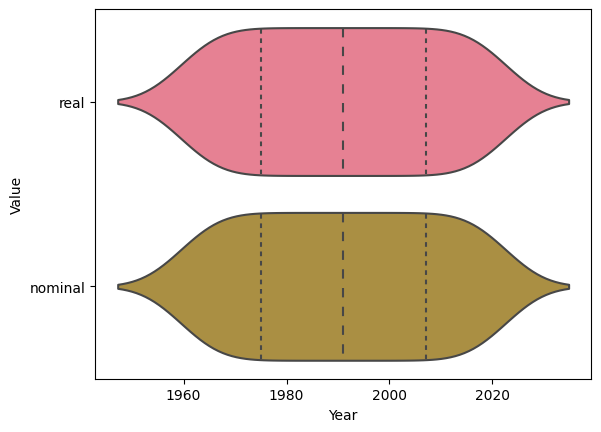

In [473]:
g = sns.violinplot(y='Value', x='Year', data=data, inner='quartile')
plt.show()

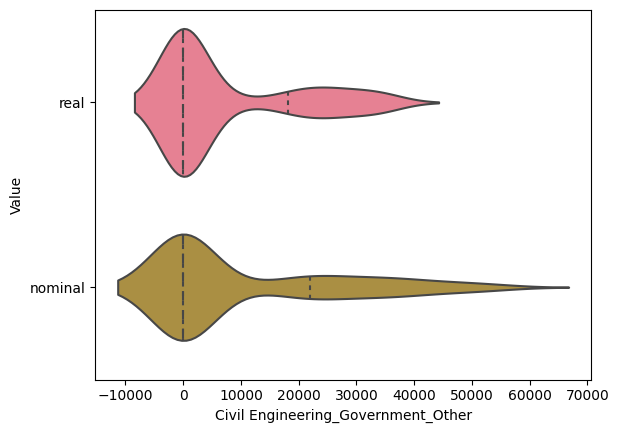

In [474]:
g = sns.violinplot(y='Value', x='Civil Engineering_Government_Other', data=data, inner='quartile')
plt.show()

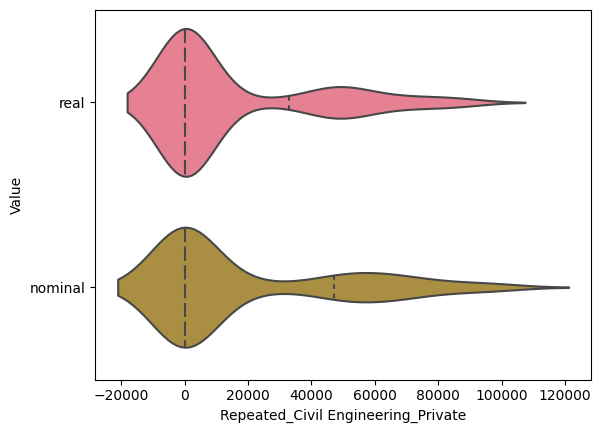

In [475]:
g = sns.violinplot(y='Value', x='Repeated_Civil Engineering_Private', data=data, inner='quartile')
plt.show()

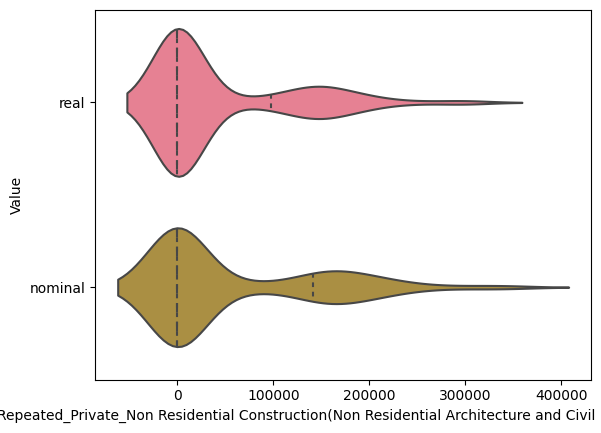

In [476]:
g = sns.violinplot(y='Value', x='Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)', data=data, inner='quartile')
plt.show()

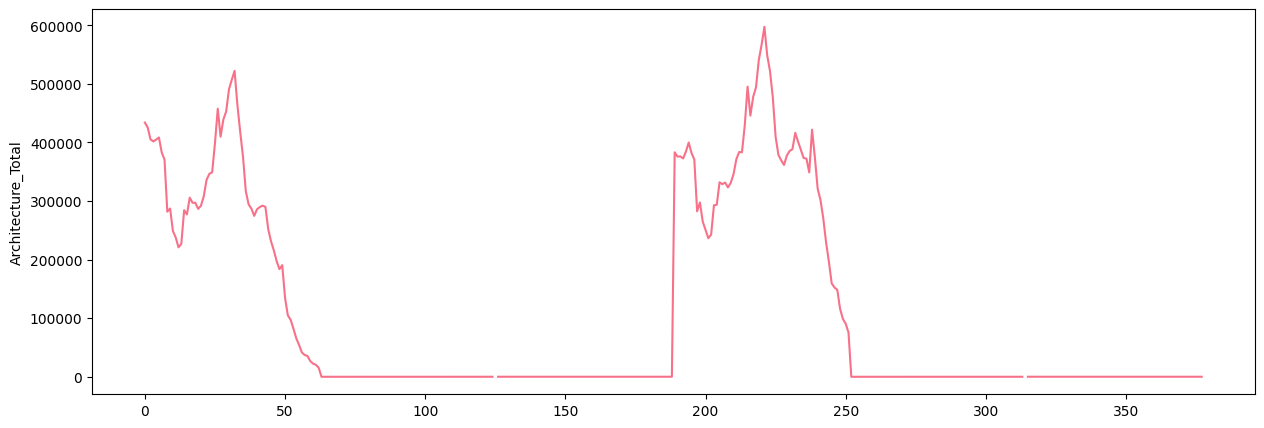

In [477]:
plt.figure(figsize=(15, 5))
plt.plot(data['Architecture_Total'])
plt.ylabel('Architecture_Total')
plt.show()

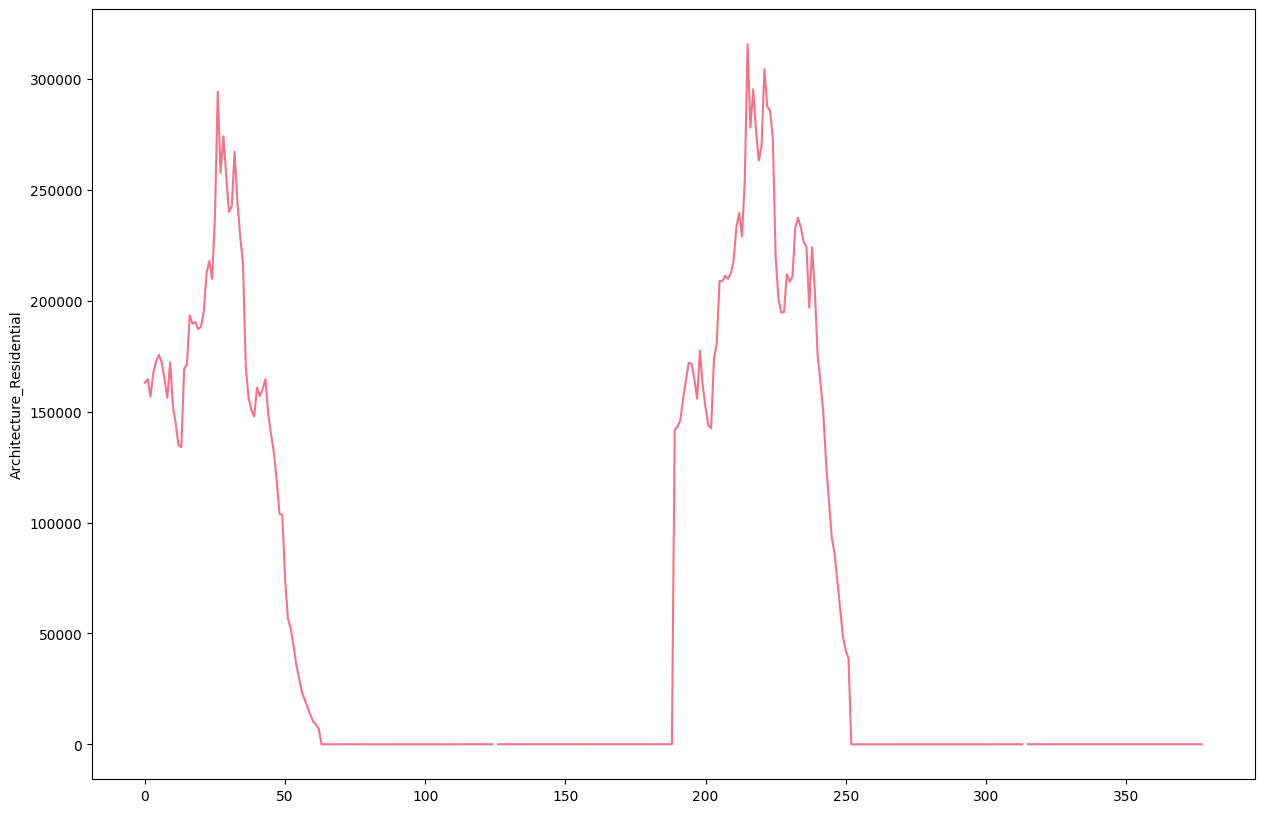

In [478]:
plt.figure(figsize=(15, 10))
plt.plot(data['Architecture_Residential'])
plt.ylabel('Architecture_Residential')
plt.show()

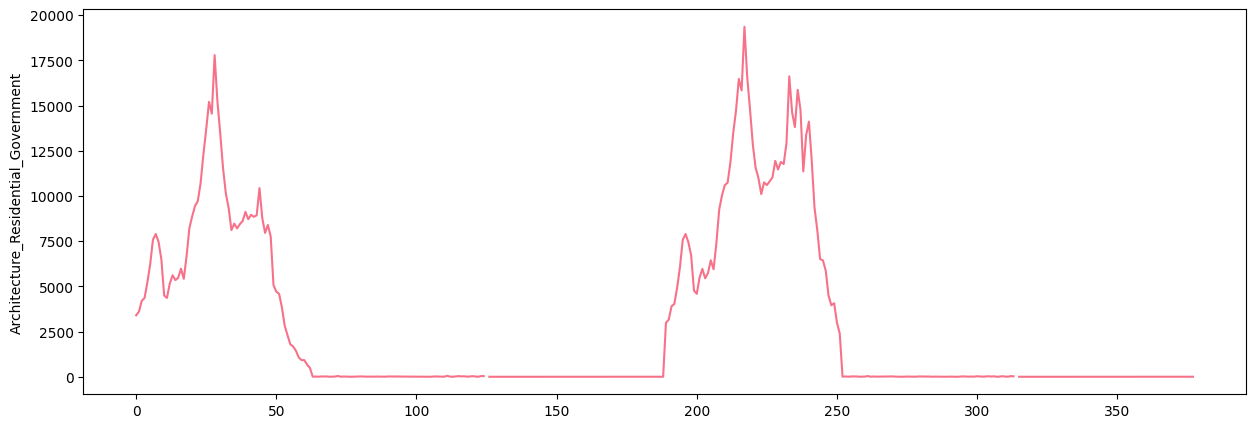

In [479]:
plt.figure(figsize=(15, 5))
plt.plot(data['Architecture_Residential_Government'])
plt.ylabel('Architecture_Residential_Government')
plt.show()

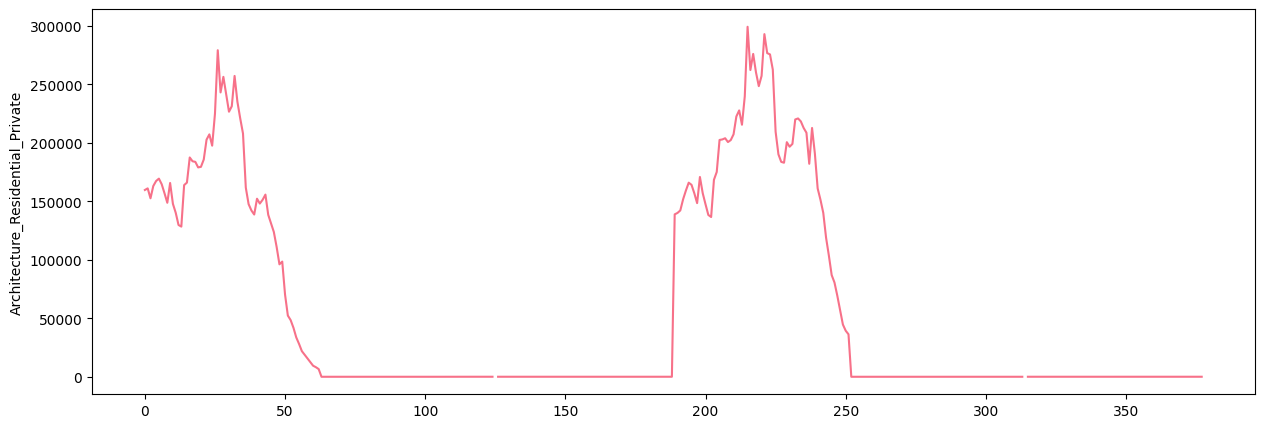

In [480]:
plt.figure(figsize=(15, 5))
plt.plot(data['Architecture_Residential_Private'])
plt.ylabel('Architecture_Residential_Private')
plt.show()

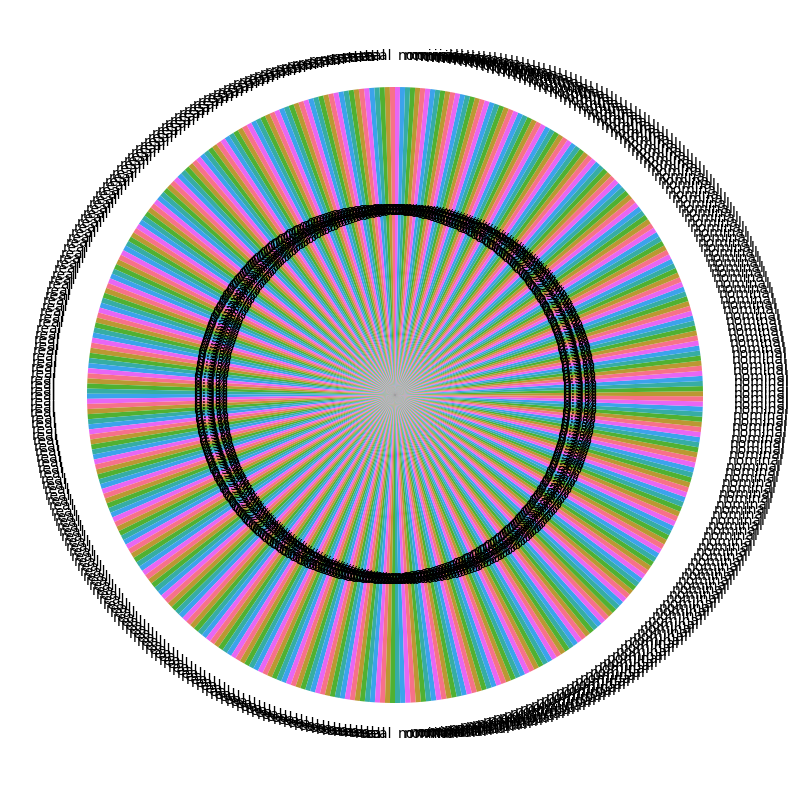

In [481]:
categories = data['Value']
counts = data['Year']
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.show()

<Axes: xlabel='Architecture_Total'>

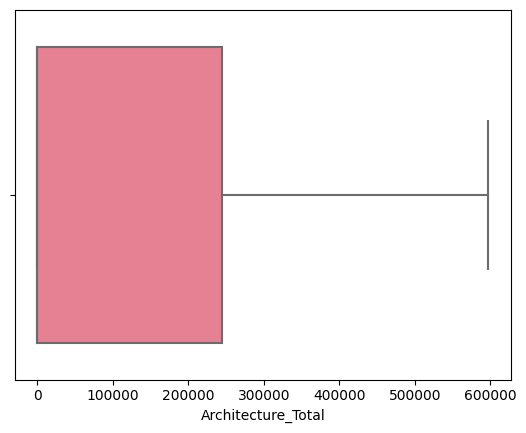

In [482]:
sns.boxplot(x=data["Architecture_Total"])

<Axes: xlabel='Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)'>

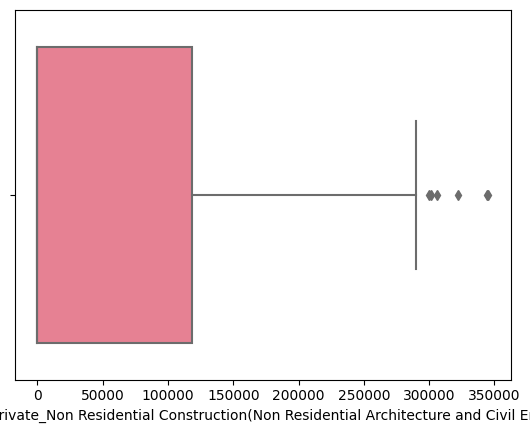

In [483]:
sns.boxplot(x=data["Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)"])

<Axes: xlabel='Year'>

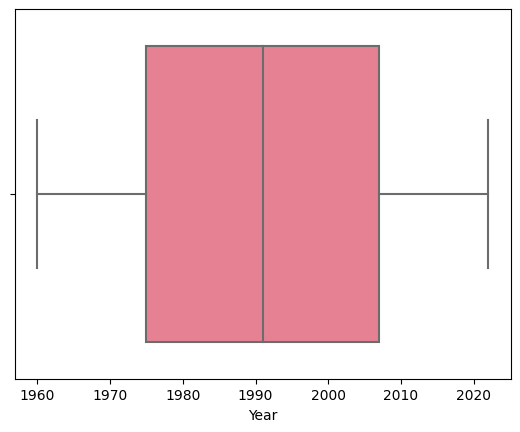

In [484]:
sns.boxplot(x=data["Year"])

<Axes: xlabel='Repeated_Architecture_Private'>

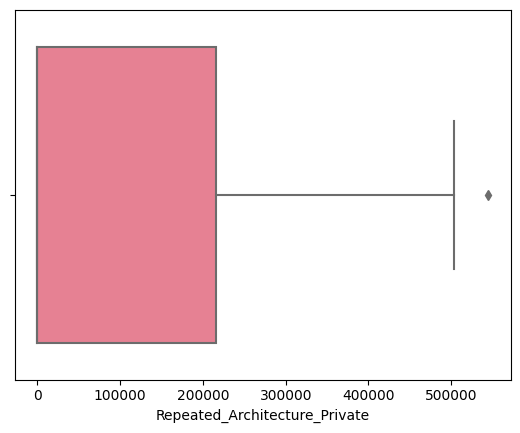

In [485]:
sns.boxplot(x=data["Repeated_Architecture_Private"])

<Axes: xlabel='Total', ylabel='Count'>

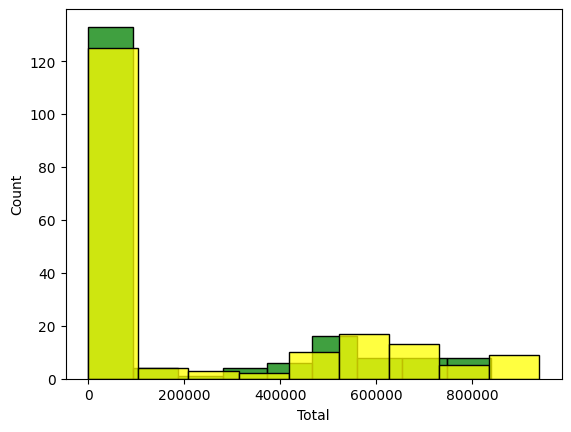

In [486]:
sns.histplot(data[data['Value']=='real']['Total'],color='green')
sns.histplot(data[data['Value']=='nominal']['Total'],color='Yellow')


<Axes: xlabel='Repeated_Architecture_Private', ylabel='Count'>

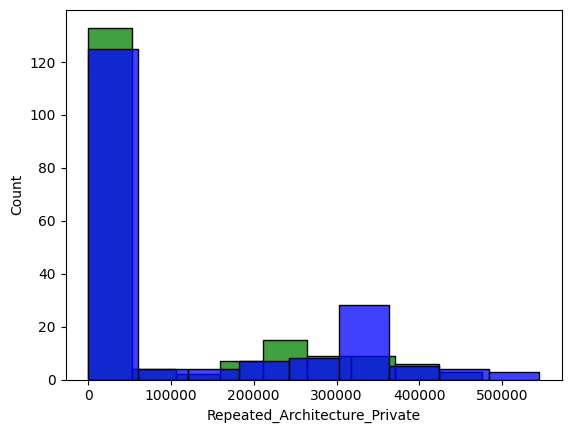

In [487]:
sns.histplot(data[data['Value']=='real']['Repeated_Architecture_Private'],color='green')
sns.histplot(data[data['Value']=='nominal']['Repeated_Architecture_Private'],color='blue')

<Axes: xlabel='Architecture_Total', ylabel='Count'>

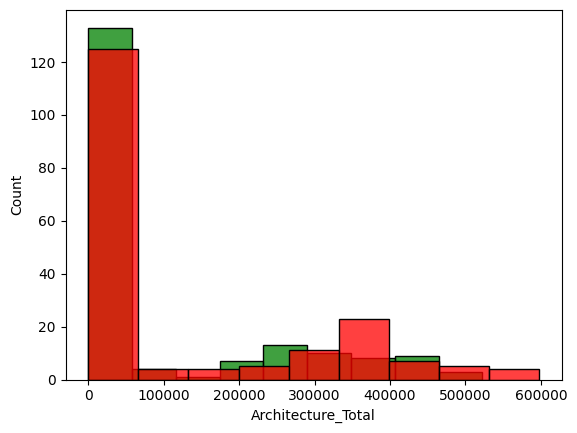

In [488]:
sns.histplot(data[data['Value']=='real']['Architecture_Total'],color='green')
sns.histplot(data[data['Value']=='nominal']['Architecture_Total'],color='red')


In [489]:
x=data.iloc[:,:-1]
x.head()

,id,Year,Value,Total,Architecture_Total,Architecture_Residential,Architecture_Residential_Government,Architecture_Residential_Private,Architecture_Non Residential,Architecture_Non Residential_Government,...,Civil Engineering_Government,Civil Engineering_Government_Public Projects,Civil Engineering_Government_Other,Civil Engineering_Private,Repeated_Total_Government,Repeated_Total_Private,Repeated_Architecture_Government,Repeated_Architecture_Private,Repeated_Civil Engineering_Government,Repeated_Civil Engineering_Private
0,1,2022,real,669900.0,434000.0,163100.0,3400.0,159700.0,157600.0,38500.0,...,164800.0,144500.0,20300.0,71100.0,225300.0,444600.0,60500.0,373500.0,164800.0,71100.0
1,2,2021,real,666000.0,425800.0,164700.0,3600.0,161100.0,148200.0,40000.0,...,171000.0,150000.0,21000.0,69200.0,233900.0,432100.0,62900.0,362900.0,171000.0,69200.0
2,3,2020,real,653600.0,405300.0,156800.0,4200.0,152600.0,145300.0,40300.0,...,180600.0,155400.0,25200.0,67700.0,244300.0,409300.0,63700.0,341600.0,180600.0,67700.0
3,4,2019,real,623280.0,401817.0,167478.0,4358.0,163120.0,155383.0,39078.0,...,167303.0,141949.0,25354.0,54160.0,224802.0,398478.0,57499.0,344318.0,167303.0,54160.0
4,5,2018,real,618271.0,404856.0,172580.0,5214.0,167366.0,153994.0,38778.0,...,158869.0,135472.0,23397.0,54546.0,215910.0,402361.0,57041.0,347815.0,158869.0,54546.0


In [490]:
y=data.iloc[:,2]
y.head()


0    real
1    real
2    real
3    real
4    real
Name: Value, dtype: object

In [491]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y=pd.DataFrame(y)
y.head()

,0
0,1
1,1
2,1
3,1
4,1


In [492]:
data.drop("id",axis=1)

,Year,Value,Total,Architecture_Total,Architecture_Residential,Architecture_Residential_Government,Architecture_Residential_Private,Architecture_Non Residential,Architecture_Non Residential_Government,Architecture_Non Residential_Private,...,Civil Engineering_Government_Public Projects,Civil Engineering_Government_Other,Civil Engineering_Private,Repeated_Total_Government,Repeated_Total_Private,Repeated_Architecture_Government,Repeated_Architecture_Private,Repeated_Civil Engineering_Government,Repeated_Civil Engineering_Private,Repeated_Private_Non Residential Construction(Non Residential Architecture and Civil Engineering)
0,2022,real,669900.0,434000.0,163100.0,3400.0,159700.0,157600.0,38500.0,119100.0,...,144500.0,20300.0,71100.0,225300.0,444600.0,60500.0,373500.0,164800.0,71100.0,190200.0
1,2021,real,666000.0,425800.0,164700.0,3600.0,161100.0,148200.0,40000.0,108200.0,...,150000.0,21000.0,69200.0,233900.0,432100.0,62900.0,362900.0,171000.0,69200.0,177400.0
2,2020,real,653600.0,405300.0,156800.0,4200.0,152600.0,145300.0,40300.0,105000.0,...,155400.0,25200.0,67700.0,244300.0,409300.0,63700.0,341600.0,180600.0,67700.0,172700.0
3,2019,real,623280.0,401817.0,167478.0,4358.0,163120.0,155383.0,39078.0,116305.0,...,141949.0,25354.0,54160.0,224802.0,398478.0,57499.0,344318.0,167303.0,54160.0,170465.0
4,2018,real,618271.0,404856.0,172580.0,5214.0,167366.0,153994.0,38778.0,115216.0,...,135472.0,23397.0,54546.0,215910.0,402361.0,57041.0,347815.0,158869.0,54546.0,169762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1964,nominal,100.0,62.1,30.9,1.9,29.0,31.2,5.4,25.8,...,21.9,8.4,7.6,37.5,62.5,7.2,54.8,30.3,7.6,33.5
374,1963,nominal,100.0,56.4,29.6,1.9,27.7,26.8,4.8,22.0,...,23.7,10.5,9.3,41.0,59.0,6.8,49.7,34.3,9.3,31.3
375,1962,nominal,100.0,55.9,27.6,2.3,25.3,28.3,6.1,22.2,...,24.0,9.8,10.2,42.3,57.7,8.4,47.5,33.9,10.2,32.5
376,1961,nominal,100.0,57.0,26.6,1.9,24.8,30.3,4.8,25.5,...,22.7,8.2,12.2,37.5,62.5,6.7,50.3,30.9,12.2,37.7


In [493]:
X = final.iloc[:,3:4].values
y = final.iloc[:,2]

In [494]:

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(378, 1)
(378,)
(226, 1)
(226,)
(152, 1)
(152,)


In [495]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4868421052631579


In [496]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5263157894736842


In [497]:
dc=DecisionTreeClassifier(max_depth=5)
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5197368421052632


In [498]:
ml=MLPClassifier(alpha=1,max_iter=1000)
ml.fit(X_train,y_train)
y_pred=ml.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.46710526315789475


In [499]:
gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5263157894736842
